In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [11]:
n_rounds = 1
data = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data.columns = ['seq'] + [i for i in range(n_rounds+1)]
# data = data.sample(n=1000)
# data.index = range(len(data))
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=False)

In [4]:
model = mb.tl.load_probound('../data/probound_model_example1.json')

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1


#activities
[[[1.         0.45478016]
  [1.         0.21102214]
  [0.99999964 0.9396246 ]]]

#log_etas
Parameter containing:
tensor([[ 2.4069, -2.4069]], requires_grad=True)


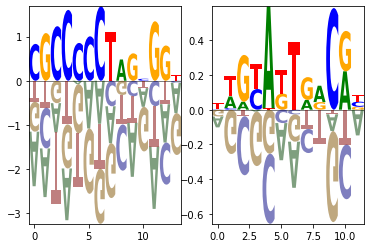

In [6]:
mb.pl.conv_mono(model)

R^2: 0.05747523151304468


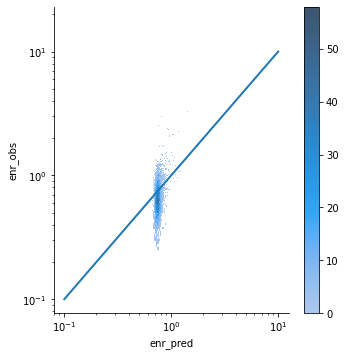

In [7]:
mb.pl.kmer_enrichment(model, train)

In [12]:
pred = mb.tl.test_network(model, train, device)

In [13]:
df = pd.DataFrame({'seq': pred[0], 't0': pred[1][:, 0], 't1': pred[1][:, 1], 'p0': pred[2][:, 0], 'p1': pred[2][:, 1]})
df.sort_values('seq')

,seq,t0,t1,p0,p1
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0.0,1.0,0.578970,0.421030
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1.0,0.0,0.577273,0.422727
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0.0,1.0,0.562226,0.437774
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1.0,0.0,0.571874,0.428126
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0.0,1.0,0.565850,0.434150
...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1.0,0.0,0.553696,0.446304
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1.0,0.0,0.585972,0.414028
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0.0,1.0,0.577855,0.422145
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1.0,0.0,0.575640,0.424360


In [14]:
model_pred = pd.read_csv('../data/ctcf_r3_count_pred.txt.gz', header=None, sep='\t')
model_pred.columns = ['seq', 0, 1]
model_pred

,seq,0,1
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0.649780,0.350220
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,0.635844,0.364156
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0.618295,0.381705
3,AAAAAACACATGTATGAGTTTTTGATGGAG,0.639897,0.360103
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0.632738,0.367262
...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,0.432509,0.567491
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,0.632339,0.367661
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0.653035,0.346965
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,0.639861,0.360139
